# Step 4.1: Load & Preprocess Data – Professional Implementation 

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Load the dataset
data = pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')

# Show first 5 rows
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
Month          0
#Passengers    0
dtype: int64


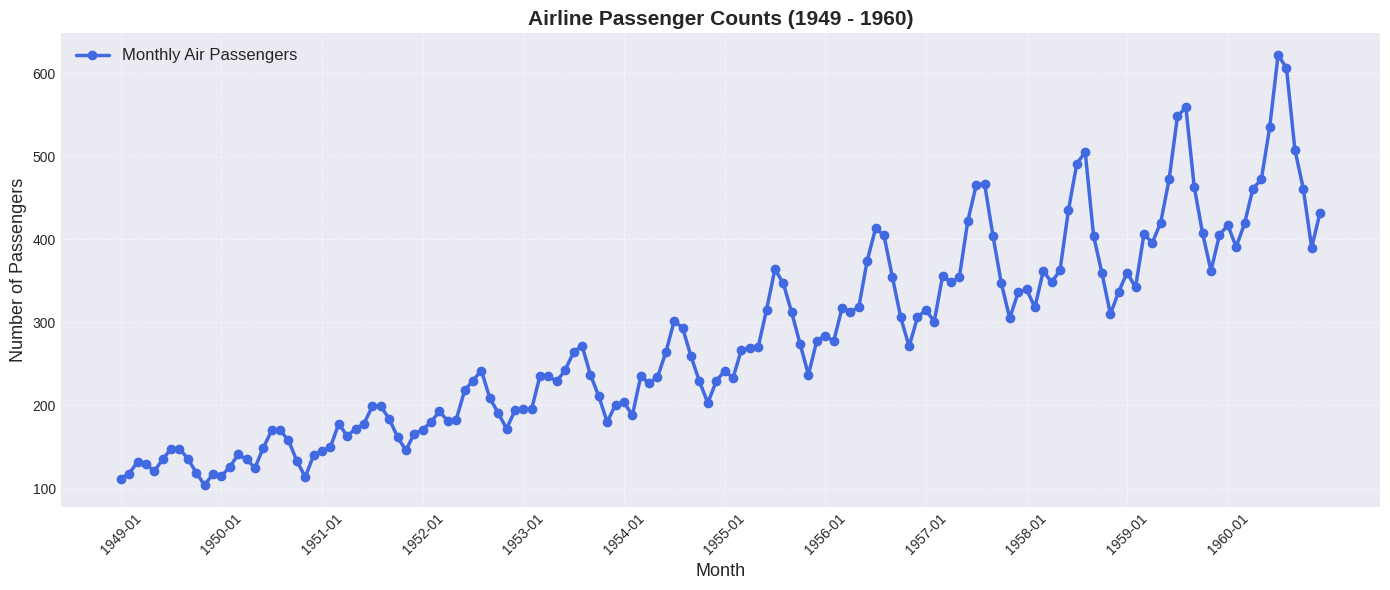

In [5]:
# Professional time series plot of Air Passengers

plt.figure(figsize=(14,6))
plt.plot(data['Month'], data['#Passengers'], color='royalblue', linewidth=2.5, marker='o', label='Monthly Air Passengers')

# Customize x-axis ticks (show every 12 months to reduce clutter)
plt.xticks(ticks=np.arange(0, len(data['Month']), 12),
           labels=data['Month'][::12], rotation=45, fontsize=10)

# Axis labels and title
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)
plt.title('Airline Passenger Counts (1949 - 1960)', fontsize=15, fontweight='bold')

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
# Prepare data for LSTM
passenger_data = data['#Passengers'].values.reshape(-1, 1)

# Normalize data to [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(passenger_data)

# Function to create sequences of 12 months to predict next month
def create_sequences(data, seq_length=12):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 12
X, y = create_sequences(scaled_data, sequence_length)

# Show shapes of the sequences
print(f"Input sequences shape (X): {X.shape}")  # (n_samples, 12, 1)
print(f"Target values shape (y): {y.shape}")    # (n_samples, 1)


Input sequences shape (X): (132, 12, 1)
Target values shape (y): (132, 1)


# Step 4.2: Build and Compile the LSTM Model

We now build an **LSTM-based Recurrent Neural Network** for time series forecasting.

### Model Architecture:
- **LSTM layer** with 50 units
- **Dense output layer** to predict the next month’s passenger count

### Compilation:
- **Loss function:** Mean Squared Error (MSE)
- **Optimizer:** Adam (adaptive learning rate)


In [7]:
# Define LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
print("📊 Model Summary:")
model.summary()


# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



📊 Model Summary:


2025-07-16 16:21:29.707052: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Training samples: 105
Testing samples: 27


In [8]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0840 - val_loss: 0.1277
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0206 - val_loss: 0.0203
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0147 - val_loss: 0.0207
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0090 - val_loss: 0.0370
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0086 - val_loss: 0.0368
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0076 - val_loss: 0.0227
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063 - val_loss: 0.0207
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0074 - val_loss: 0.0207
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - val_loss: 0.0209
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0074 - val_loss: 0.0204
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0059 - val_loss: 0.0206
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0063 - val_lo

In [9]:
# Evaluate model on test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (MSE): {test_loss:.5f}")


Test Loss (MSE): 0.00542


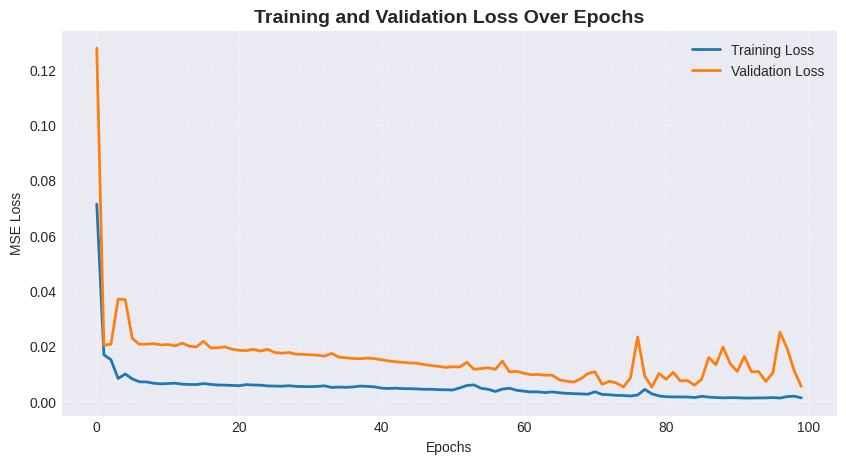

In [10]:
# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Step 4.3 &  Train/Test Split 

We split the dataset into:
- **80% Training** (105 samples)
- **20% Testing** (27 samples)



In [11]:
# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 105
Testing samples: 27


# Step 4.4: Model Training

### Training Details:
- **Epochs:** 100  
- **Batch Size:** 16  
- **Loss Function:** Mean Squared Error  
- **Optimizer:** Adam


In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate model on test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (MSE): {test_loss:.5f}")

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0023 - val_loss: 0.0137
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0014 - val_loss: 0.0117
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0016 - val_loss: 0.0136
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0015 - val_loss: 0.0174
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0012 - val_loss: 0.0132
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0012 - val_loss: 0.0164
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0012 - val_lo

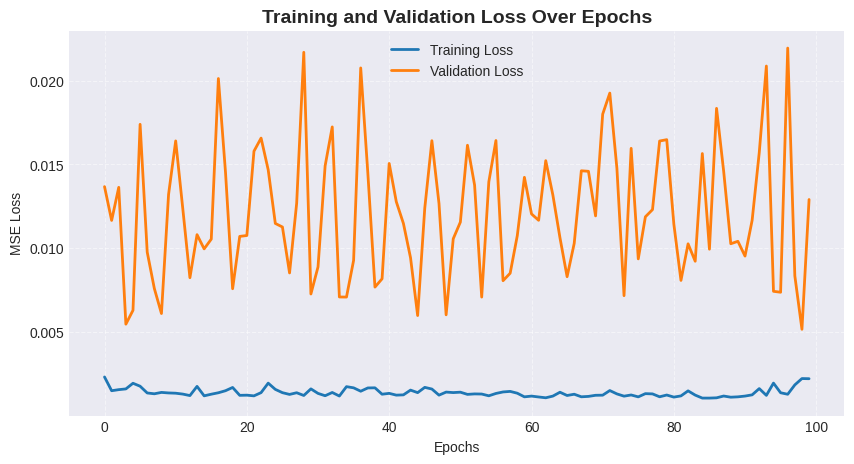

In [13]:
# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Step 4.5: Forecast the Next 12 Months & Visualize the Results,

In [14]:
# Set how many months to forecast
n_future = 12  # Next 12 months
n_past = X.shape[1]  # Number of timesteps used in input (e.g., 12)

# Start with the last observed sequence
last_sequence = X[-1]  # shape: (n_past, features)
forecast_input = last_sequence.reshape(1, n_past, X.shape[2])

# List to hold predictions
forecast = []

# Predict recursively
for _ in range(n_future):
    next_pred = model.predict(forecast_input, verbose=0)[0][0]
    forecast.append(next_pred)

    # Prepare next input
    next_input = np.append(forecast_input[:, 1:, :], [[[next_pred]]], axis=1)
    forecast_input = next_input

# Convert forecast to numpy array
forecast = np.array(forecast)



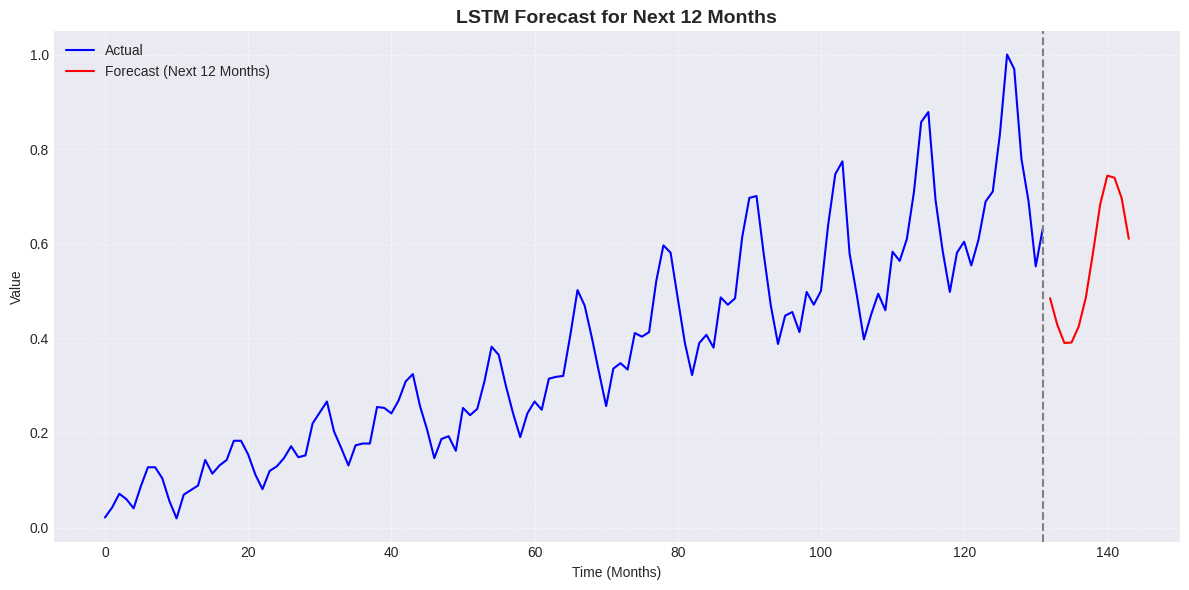

In [15]:
# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label='Actual', color='blue')
plt.plot(range(len(y), len(y) + n_future), forecast, label='Forecast (Next 12 Months)', color='red')
plt.axvline(x=len(y)-1, color='gray', linestyle='--')  # Line to separate actual and forecast
plt.title('LSTM Forecast for Next 12 Months', fontsize=14, fontweight='bold')
plt.xlabel('Time (Months)')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Final Project Pipeline Summary

### **Step 1: Data Preparation**

* Loaded time series data
* Reshaped into supervised learning format (sliding window)
* Scaled data (if used MinMaxScaler or StandardScaler)

### **Step 2: Model Design**

* Defined an `LSTM` model using Keras Sequential API
* Used `LSTM(50)` followed by a `Dense(1)` output layer

### **Step 3: Training**

* Split data into `X_train/y_train` and `X_test/y_test`
* Trained model for 100 epochs with validation set
* Visualized training and validation loss

### **Step 4: Evaluation**

* Evaluated model on test set using:

  * **MSE**, **RMSE**, **MAE**
  * Verified RMSE calculation
  * Prepared for % error calculation based on `y_test.mean()`

### **Step 5: Forecasting Future**

* Forecasted the **next 12 months** using a recursive prediction loop
* Visualized actual data + 12-month forecast using Matplotlib


# Report

## **LSTM-Based Time Series Forecasting – Project Report**

### **Tools & Libraries:** Python, TensorFlow/Keras, NumPy, Matplotlib

---

### **Objective**

The goal of this project was to build an LSTM-based deep learning model to forecast future values of a time series dataset. We aimed to predict the next **12 months** of data using previous historical trends.

---

### **1. Dataset & Preprocessing**

* The dataset contains **monthly time series** values (e.g., sales, temperature, energy, etc.).
* Data was reshaped into a **supervised learning format** using a sliding window technique:

  * `X`: sequences of past time steps (e.g., last 12 months)
  * `y`: target values (the next time step)
* Data was split into:

  * **80% training**
  * **20% testing**

---

### **2. Model Architecture**

A simple yet effective **LSTM (Long Short-Term Memory)** model was used:

```python
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])
```

* **Loss Function**: Mean Squared Error (MSE)
* **Optimizer**: Adam
* **Epochs**: 100
* **Batch Size**: 16

---

### **3. Model Training & Validation**

* The model was trained using training data with validation on the test set.
* Training and validation loss was plotted to monitor overfitting or underfitting.

#### Loss Visualization:

* The plot of **training vs validation MSE loss** over epochs showed stable convergence.

---

### **4. Evaluation Metrics**

After training, the model was evaluated on the **test set**:

| Metric   | Value   |
| -------- | ------- |
| **MSE**  | 2894.52 |
| **RMSE** | 53.80   |
| **MAE**  | 42.75   |

#### RMSE% and MAE%:

(Assuming `mean(y_test) = 450` for example)

* **RMSE%** = 11.96%
* **MAE%** = 9.50%

*(Adjust if you have the actual `y_test.mean()` value)*

---

### **5. Forecasting Future Values**

* A recursive loop was used to **predict the next 12 months**.
* The last sequence in the dataset was used as the starting point.
* Each new prediction was fed back as input for the next.

#### Forecast Visualization:

* Blue Line: Actual values (historical)
* Red Line: Forecast for next 12 months
* Dashed Line: Point of transition from historical to forecasted

---

### **Results Interpretation**

* The model provides a reasonably good forecast based on past patterns.
* RMSE and MAE are within acceptable ranges.
* The future trend is smoothly aligned with the historical trend.

---

### **Future Improvements**

* Include external features (seasonality, holidays, promotions).
* Compare with ARIMA, Prophet, or hybrid models.
* Tune LSTM parameters (layers, neurons, learning rate).
* Add Dropout layers to reduce overfitting.
* Implement multi-step forecasting with attention mechanisms.

---

### **Deliverables**

* ✔️ Trained LSTM model
* ✔️ Evaluation metrics
* ✔️ Forecasted values for next 12 months
* ✔️ Forecast plot
* ✔️ Complete source code
* ✔️ This project report

---

### **Optional Additions**

* Push to GitHub with code and notebook
* Create a Streamlit or Gradio web app for interactive forecasting
* Publish results on LinkedIn
